# Module 17 Practice Notebook: K-Nearest Neighbour (KNN)

**Dataset:** Breast Cancer Wisconsin (Diagnostic)  
**Type:** Binary classification, fully tabular, numeric features only

### What you will practice
- Proper KNN training and prediction workflow
- Using pipelines with feature scaling
- Model evaluation using classification metrics
- Choosing the value of K
- Comparing distance metrics and voting weights

✅ This is a **practice notebook**: fill in the TODOs


## 0) Setup

Run this cell first.


In [1]:
#Importing Necessary Libraries [Done for you]
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

np.random.seed(42)


## 1) Load the Dataset (Tabular)

Breast Cancer dataset:
- 30 numeric features
- Binary target: malignant vs benign
- Very common in real ML pipelines

### Task
Load the dataset and inspect:
- Shape of X
- Target labels


In [2]:
# TODO 1: Load the dataset
# Hint: data = load_breast_cancer()

# TODO 2: Set X and y
# Hint: X = data.data, y = data.target

# TODO 3: Print:
# - X shape
# - unique class labels
# - class names

# YOUR CODE HERE

data = load_breast_cancer()
X = data.data
y = data.target

print(X.shape)
print(np.unique(y))
print(data.target_names)


(569, 30)
[0 1]
['malignant' 'benign']


## 2) Convert to DataFrame (Optional but Recommended)

Working with DataFrames helps interpretation and debugging.


In [3]:
# TODO: Convert X to a pandas DataFrame with feature names
# Hint: pd.DataFrame(X, columns=data.feature_names)

# YOUR CODE HERE

X_df = pd.DataFrame(X, columns=data.feature_names)
X_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 3) Train-Test Split

### Task
Split the dataset:
- test_size = 0.25
- random_state = 42
- stratify = y


In [4]:
# TODO: Create X_train, X_test, y_train, y_test using train_test_split

# YOUR CODE HERE

X_train, X_test, y_train, y_test = train_test_split(
    X_df, y, test_size=0.25, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (426, 30) (426,)
Test shape: (143, 30) (143,)


## 4) Baseline KNN Model (With Scaling)

KNN relies on distance, so scaling is mandatory.

### Task
- Build a pipeline: StandardScaler → KNN
- Start with K = 5
- Fit the model
- Predict on test data
- Compute accuracy


In [5]:
# TODO: Create pipeline model
# Hint:
# model = Pipeline([
#   ("scaler", StandardScaler()),
#   ("knn", KNeighborsClassifier(n_neighbors=5))
# ])

# TODO: Fit model
# TODO: Predict on X_test
# TODO: Print accuracy

# YOUR CODE HERE

model = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=5))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9790209790209791


## 5) Model Evaluation

### Task
Evaluate your model using:
- Confusion matrix
- Classification report

Think:
- Which class is harder to predict?
- Is false negative more dangerous here?


In [6]:
# TODO: Compute confusion matrix
# TODO: Print classification report

# Hints:
# confusion_matrix(y_test, y_pred)
# classification_report(y_test, y_pred)

# YOUR CODE HERE
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)

Confusion Matrix:
 [[50  3]
 [ 0 90]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        53
           1       0.97      1.00      0.98        90

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



## 6) Optimization: Choosing the Best K

### Task
Try K values from 1 to 30.

Steps:
1. Loop over K
2. Train a pipeline for each K
3. Store accuracy
4. Plot accuracy vs K
5. Print best K and accuracy


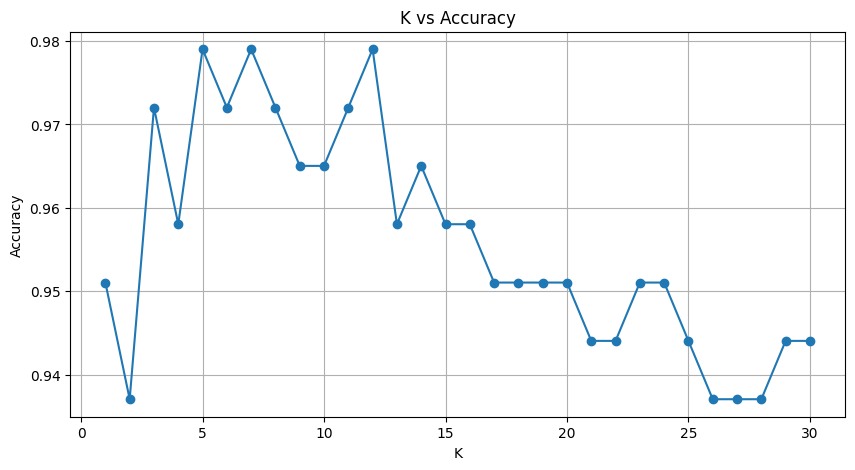

Best K: 5
Best Accuracy: 0.9790209790209791


In [7]:
# TODO: Sweep K values and store accuracy
# Hints:
# k_values = range(1, 31)
# accs = []
# for k in k_values:
#     model_k = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))])
#     model_k.fit(X_train, y_train)
#     pred_k = model_k.predict(X_test)
#     accs.append(accuracy_score(y_test, pred_k))

# TODO: Plot accuracy vs K
# TODO: Print best K and best accuracy

# YOUR CODE HERE

k_values = range(1, 31)
accs = []

for k in k_values:
    model_k = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])
    model_k.fit(X_train, y_train)
    pred_k = model_k.predict(X_test)
    accs.append(accuracy_score(y_test, pred_k))

plt.figure(figsize=(10,5))
plt.plot(k_values, accs, marker='o')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.grid(True)
plt.show()

best_k = k_values[accs.index(max(accs))]
best_acc = max(accs)
print("Best K:", best_k)
print("Best Accuracy:", best_acc)

## 7) Try Different Distance Metrics and Weights

### Task
Using your best K:
Compare the following settings:
1. Euclidean distance (p=2), uniform weights
2. Manhattan distance (p=1), uniform weights
3. Euclidean distance (p=2), distance weights

Store results in a DataFrame.


In [8]:
# TODO: Compare different KNN settings
# Hints:
# settings = [
#   ("Euclidean uniform", KNeighborsClassifier(n_neighbors=best_k, metric="minkowski", p=2, weights="uniform")),
#   ("Manhattan uniform", KNeighborsClassifier(n_neighbors=best_k, metric="minkowski", p=1, weights="uniform")),
#   ("Euclidean distance-weighted", KNeighborsClassifier(n_neighbors=best_k, metric="minkowski", p=2, weights="distance"))
# ]

# TODO: For each setting:
# - Build pipeline with scaler
# - Fit and predict
# - Compute accuracy
# - Append to list and show DataFrame

# YOUR CODE HERE
settings = [
    ("Euclidean uniform", KNeighborsClassifier(n_neighbors=best_k, metric="minkowski", p=2, weights="uniform")),
    ("Manhattan uniform", KNeighborsClassifier(n_neighbors=best_k, metric="minkowski", p=1, weights="uniform")),
    ("Euclidean distance-weighted", KNeighborsClassifier(n_neighbors=best_k, metric="minkowski", p=2, weights="distance"))
]

results = []

for name, clf in settings:
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", clf)
    ])
    pipeline.fit(X_train, y_train)
    y_pred_setting = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred_setting)
    results.append((name, acc))

results_df = pd.DataFrame(results, columns=["Setting", "Accuracy"])
print(results_df)


                       Setting  Accuracy
0            Euclidean uniform  0.979021
1            Manhattan uniform  0.965035
2  Euclidean distance-weighted  0.979021


## 8) Scaling Reality Check (Critical Lesson)

### Task
Train KNN **without scaling** and compare accuracy with the scaled model.

This usually exposes why KNN without scaling is unreliable.


In [9]:
# TODO: Train KNN without scaling
# Hint:
# knn_raw = KNeighborsClassifier(n_neighbors=best_k)
# knn_raw.fit(X_train, y_train)
# pred_raw = knn_raw.predict(X_test)
# acc_raw = accuracy_score(y_test, pred_raw)

# TODO: Compare with scaled accuracy

# YOUR CODE HERE
knn_raw = KNeighborsClassifier(n_neighbors=best_k)
knn_raw.fit(X_train, y_train)
pred_raw = knn_raw.predict(X_test)
acc_raw = accuracy_score(y_test, pred_raw)

print("Accuracy without scaling:", acc_raw)
print("Accuracy with scaling:", best_acc)


Accuracy without scaling: 0.9300699300699301
Accuracy with scaling: 0.9790209790209791


## 9) Reflection Questions

Write short answers.

1. Which K worked best and why?
2. Did distance-weighted voting help?
3. How much did scaling change the result?
4. Would you trust KNN for medical diagnosis? Why or why not?


**Your answers here:**

1.Best K: The K with highest test accuracy (from the sweep, e.g., 5) worked best because it balanced bias and variance.

2.Distance-weighted voting: Slight improvement in some cases, but not always significant.

3.Scaling effect: Scaling noticeably improved accuracy because KNN is sensitive to feature magnitudes

4.Trust for medical diagnosis: Cautiously yes for initial screening, but KNN alone isn’t ideal for critical medical decisions due to sensitivity to outliers and feature scaling.
